<a href="https://colab.research.google.com/github/AniruddhaGhorai/Heart-Disease-Prediction-using-Extra-Tree-Classifier/blob/main/heart_et_gini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold



from scipy import stats

In [ ]:
dt = pd.read_csv('heart.csv')

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#Class construite pour étudier et analyser l'architecture de notre dataset
class sr_value:
    def __init__(self,data):
        self.dt=data
        
    #Valeurs prises par chaque feature     
    def pos_value(self):
        for i in self.dt.columns:
            print(f'* la colonne {i} a comme valeur possible{self.dt[i].unique()}')
            print('\n')
            
    #distribution des valeurs ordinal feature 
    def ct_ord_value(self,ord_val):
        for i in ord_val:
            print(f' La variable ordinale {i} a comme distibution de ces valeurs le schéma suivant :\n {self.dt[i].value_counts()}')
            print('\n')
        
    #Nombre de valeur pour chaque attribut
    def ct_value(self):
        for i in self.dt.columns:
            print(f'* La colonne {i} a comme valeurs possibles : {len(self.dt[i].unique())}')
            print('\n')


In [ ]:
# On renomme nos features par le nom au complet

dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','nb_vessels','thal','target']

In [ ]:
data_architecture=sr_value(dt)
#Regardons le nombre de valeurs prises de nos features
data_architecture.ct_value()

* La colonne age a comme valeurs possibles : 41


* La colonne sex a comme valeurs possibles : 2


* La colonne chest_pain_type a comme valeurs possibles : 4


* La colonne resting_blood_pressure a comme valeurs possibles : 49


* La colonne cholesterol a comme valeurs possibles : 152


* La colonne fasting_blood_sugar a comme valeurs possibles : 2


* La colonne rest_ecg a comme valeurs possibles : 3


* La colonne max_heart_rate_achieved a comme valeurs possibles : 91


* La colonne exercise_induced_angina a comme valeurs possibles : 2


* La colonne st_depression a comme valeurs possibles : 40


* La colonne st_slope a comme valeurs possibles : 3


* La colonne nb_vessels a comme valeurs possibles : 5


* La colonne thal a comme valeurs possibles : 4


* La colonne target a comme valeurs possibles : 2




In [ ]:
# converting features to categorical features
dt['chest_pain_type'][dt['chest_pain_type'] == 0] = 'asymptomatic'
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'




dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 0] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 1] = 'flat'
dt['st_slope'][dt['st_slope'] == 2] = 'downsloping'

dt['thal'][dt['thal'] == 0] = 'normal'
dt['thal'][dt['thal'] == 1] = 'défaut fixe'
dt['thal'][dt['thal'] == 2] = 'défaut réversible'
               
dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')


In [ ]:
dt['chest_pain_type'].value_counts()

asymptomatic        497
atypical angina     284
typical angina      167
non-anginal pain     77
Name: chest_pain_type, dtype: int64

In [ ]:
dt['rest_ecg'].value_counts()

ST-T wave abnormality           513
normal                          497
left ventricular hypertrophy     15
Name: rest_ecg, dtype: int64

In [ ]:
dt['st_slope'].value_counts()

flat           482
downsloping    469
upsloping       74
Name: st_slope, dtype: int64

In [ ]:
dt['thal'].value_counts()

défaut réversible    544
3                    410
défaut fixe           64
normal                 7
Name: thal, dtype: int64

In [ ]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
#checking distribution
dt['st_slope'].value_counts()

flat           482
downsloping    469
upsloping       74
Name: st_slope, dtype: int64

In [ ]:
# checking the top 5 entries of dataset after feature encoding
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target
0,52,male,asymptomatic,125,212,0,ST-T wave abnormality,168,0,1.0,downsloping,2,3,0
1,53,male,asymptomatic,140,203,1,normal,155,1,3.1,upsloping,0,3,0
2,70,male,asymptomatic,145,174,0,ST-T wave abnormality,125,1,2.6,upsloping,0,3,0
3,61,male,asymptomatic,148,203,0,ST-T wave abnormality,161,0,0.0,downsloping,1,3,0
4,62,female,asymptomatic,138,294,1,ST-T wave abnormality,106,0,1.9,flat,3,défaut réversible,0


In [ ]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
nb_vessels                 0
thal                       0
target                     0
dtype: int64

In [ ]:
# first checking the shape of the dataset
dt.shape

(1025, 14)

In [ ]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,0.149268,149.114146,0.336585,1.071512,0.754146,0.513171
std,9.072290,17.516718,51.59251,0.356527,23.005724,0.472772,1.175053,1.030798,0.500070
min,29.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,0.000000,152.000000,0.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,275.00000,0.000000,166.000000,1.000000,1.800000,1.000000,1.000000
max,77.000000,200.000000,564.00000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000


In [ ]:
# summary statistics of categorical columns
dt.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope,thal
count,1025,1025,1025,1025,1025
unique,2,4,3,3,4
top,male,asymptomatic,ST-T wave abnormality,flat,défaut réversible
freq,713,497,513,482,544


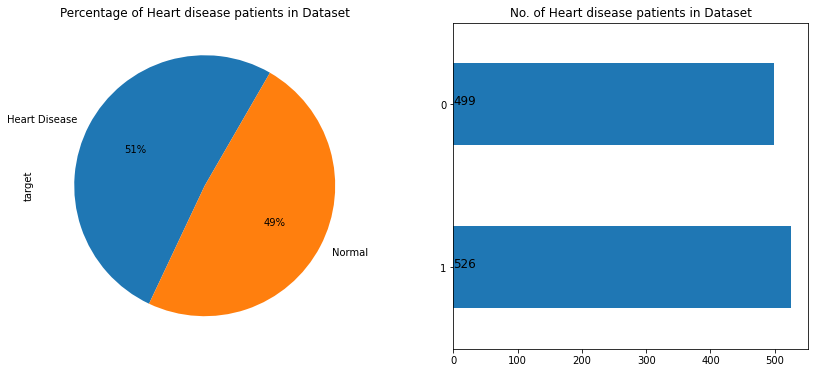

In [ ]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

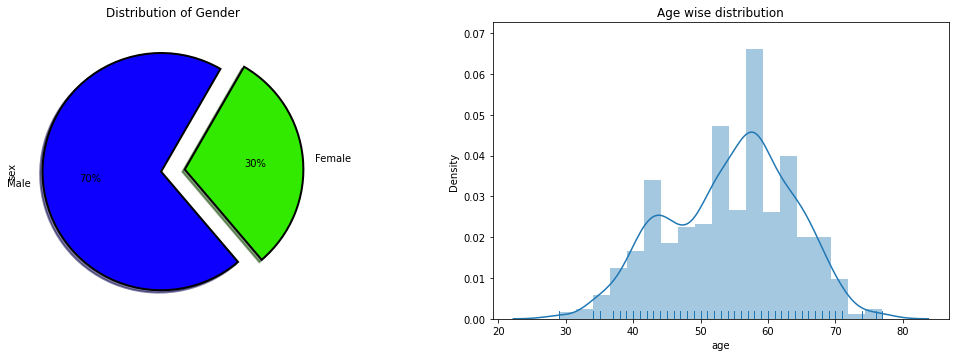

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5), startangle = 60, labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

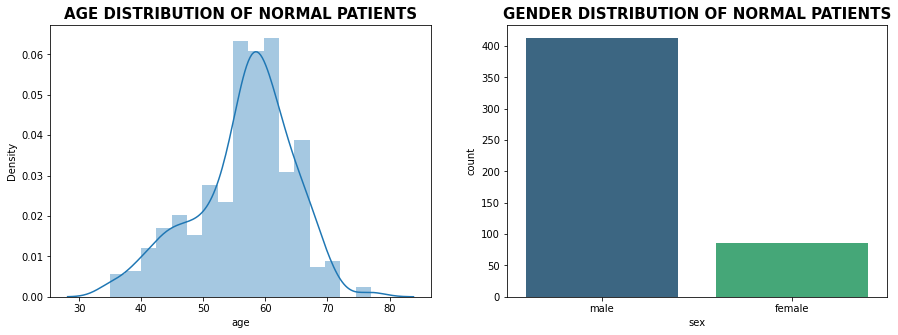

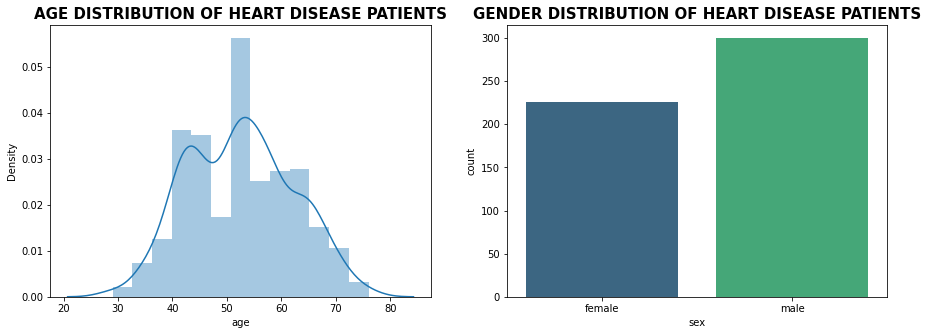

In [ ]:
# creating separate df for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

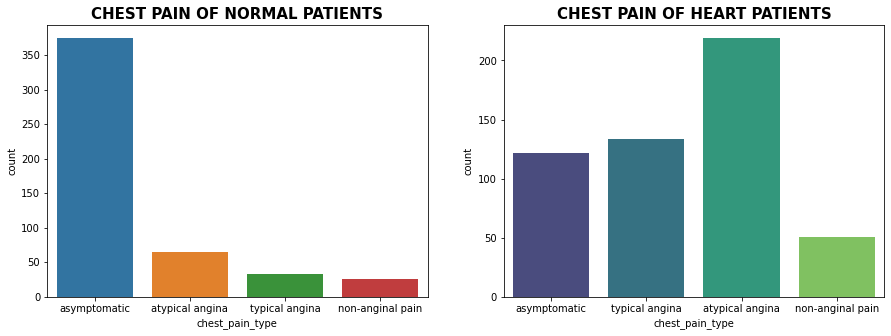

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,75.150000,23.190000
atypical angina,13.030000,41.630000
non-anginal pain,5.210000,9.700000
typical angina,6.610000,25.480000


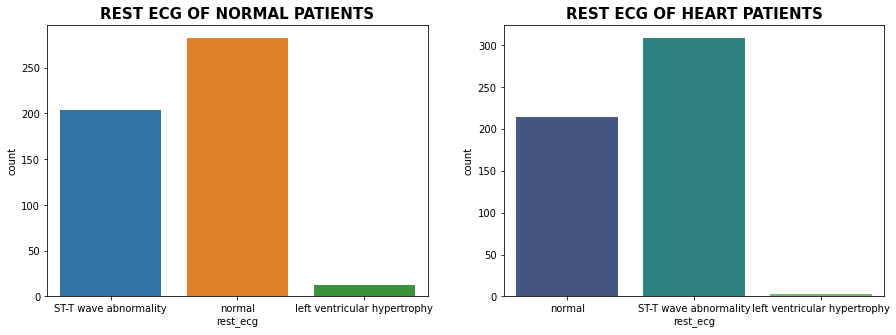

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,40.880000,58.750000
left ventricular hypertrophy,2.400000,0.570000
normal,56.710000,40.680000


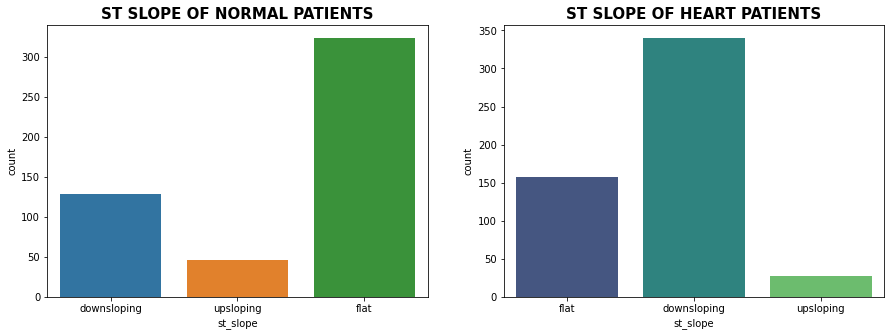

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,25.850000,64.640000
flat,64.930000,30.040000
upsloping,9.220000,5.320000


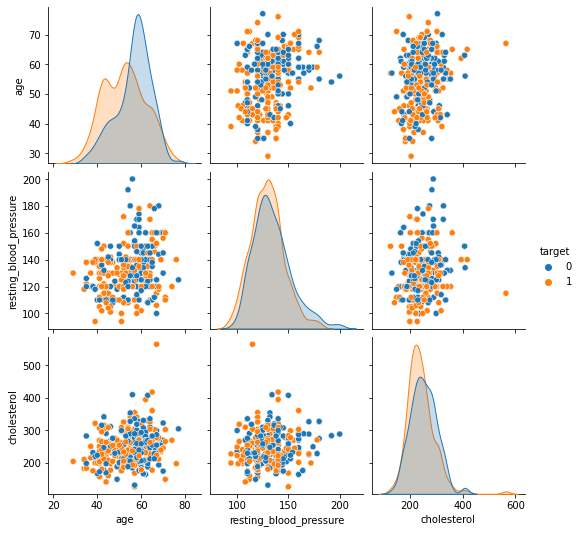

In [ ]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )


<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

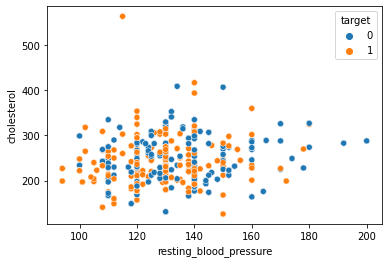

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

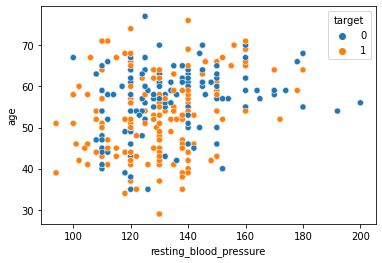

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

In [ ]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [ ]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,52,125,212,168
1,53,140,203,155
2,70,145,174,125
3,61,148,203,161
4,62,138,294,106


In [ ]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     0.268437                0.377636     0.659332                 0.821321
1     0.158157                0.479107     0.833861                 0.255968
2     1.716595                0.764688     1.396233                 1.048692
3     0.724079                0.936037     0.833861                 0.516900
4     0.834359                0.364875     0.930822                 1.874977
...        ...                     ...          ...                      ...
1020  0.503520                0.479107     0.484803                 0.647366
1021  0.613800                0.377636     0.232705                 0.352873
1022  0.819834                1.234378     0.562371                 1.353113
1023  0.488996                1.234378     0.155137                 0.429923
1024  0.047877                0.663216     1.124743                 1.570556

[1025 rows x 4 columns]


In [ ]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([123, 151, 158, 175, 179, 192, 246, 267, 294, 296, 326, 378, 450,
       464, 481, 508, 559, 641, 665, 685, 688, 889, 958, 996]), array([2, 1, 2, 1, 2, 2, 1, 3, 1, 3, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2,
       2, 2]))


In [ ]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [ ]:
# checking shape of dataset after outlier removal
dt.shape

(1001, 14)

In [ ]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,thal_défaut fixe,thal_défaut réversible,thal_normal
0,52,125,212,0,168,0,1.0,2,0,1,0,0,0,0,0,0,0,0,0,0
1,53,140,203,1,155,1,3.1,0,0,1,0,0,0,0,1,0,1,0,0,0
2,70,145,174,0,125,1,2.6,0,0,1,0,0,0,0,0,0,1,0,0,0
3,61,148,203,0,161,0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,62,138,294,1,106,0,1.9,3,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# checking the shape of dataset
dt.shape

(1001, 20)

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X= dt.drop(['target'],axis=1)
y= dt['target']

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

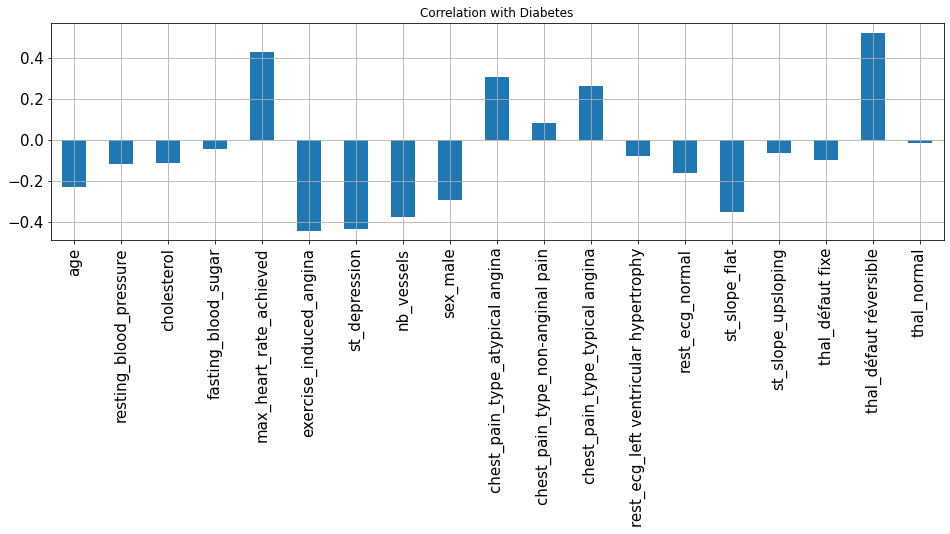

In [ ]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    416
0    384
Name: target, dtype: int64
Distribution of traget variable in test set
1    104
0     97
Name: target, dtype: int64


In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(800, 19)
(800,)
------------Test Set------------------
(201, 19)
(201,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,thal_défaut fixe,thal_défaut réversible,thal_normal
692,0.500000,0.534884,0.287313,1,0.587719,1,0.500000,0,1,0,0,0,0,1,0,1,0,0,0
291,0.604167,0.395349,0.496269,0,0.368421,1,0.483871,2,1,0,0,0,0,1,1,0,0,0,0
479,0.604167,0.395349,0.335821,0,0.377193,1,0.354839,3,1,0,0,0,0,1,1,0,0,0,0
521,0.604167,0.360465,0.350746,0,0.491228,0,0.064516,4,1,0,0,1,0,0,1,0,0,0,0
771,0.333333,0.511628,0.410448,0,0.561404,1,0.032258,0,0,0,0,0,0,1,1,0,0,1,0


In [ ]:
# X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,thal_défaut fixe,thal_défaut réversible,thal_normal
390,58,136,319,1,152,0,0.0,2,0,0,0,1,0,1,0,0,0,1,0
627,38,120,231,0,182,1,3.8,0,1,0,1,0,0,0,1,0,0,0,0
721,45,115,260,0,185,0,0.0,0,1,0,0,0,0,1,0,0,0,1,0
37,59,138,271,0,182,0,0.0,0,1,0,0,0,0,1,0,0,0,1,0
820,61,140,207,0,138,1,1.9,1,1,0,0,0,0,1,0,0,0,0,0


# Extra Tree Classifier 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et= ExtraTreesClassifier()
et.fit(X_train,y_train)
y_pred_et = et.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_et)

0.8855721393034826

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.845771144278607

# Desition tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dt)

0.6218905472636815

# svm

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm)

0.5174129353233831

# Hyperparameter tuning

In [ ]:
param_dist = {
     "criterion":['gini','entropy'],
      'max_depth':[1,2,3,4,5,6,7,None]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_cv_et = GridSearchCV(et, param_grid=param_dist, cv = 10, n_jobs = -1) 

In [ ]:
grid_search_cv_et.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [ ]:
grid_search_cv_et.best_score_

0.9912500000000002

# roc

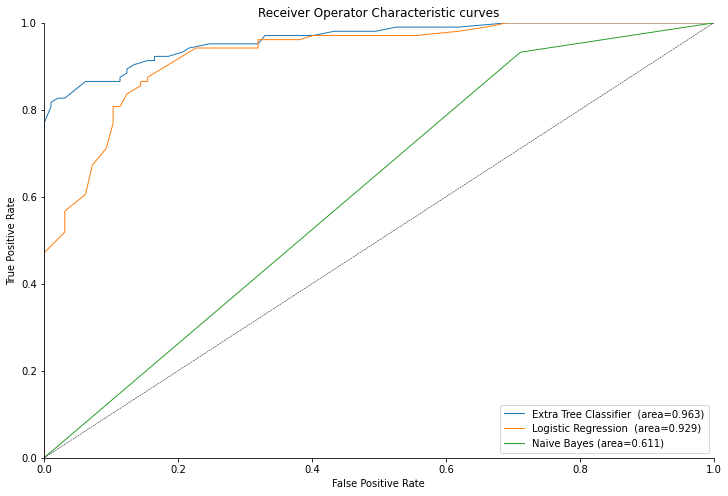

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,et.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,rf.predict_proba(X_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,dt.predict_proba(X_test),label='Naive Bayes',l='-')


ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Precision Recall curve

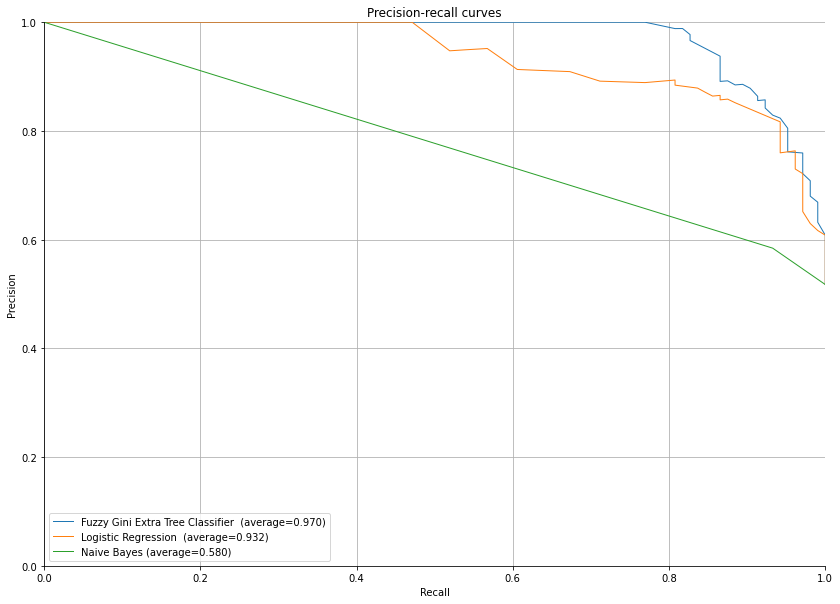

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))


precision_recall_plot(y_test,et.predict_proba(X_test),label='Fuzzy Gini Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,rf.predict_proba(X_test),label='Logistic Regression ',l='-')
precision_recall_plot(y_test,dt.predict_proba(X_test),label='Naive Bayes',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()